## ResNet

In [1]:
from torchvision import models

In [2]:
resnet = models.resnet101(pretrained = True)

In [3]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [4]:
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
    )
])

In [5]:
from PIL import Image
img = Image.open("./data/654.jpg")

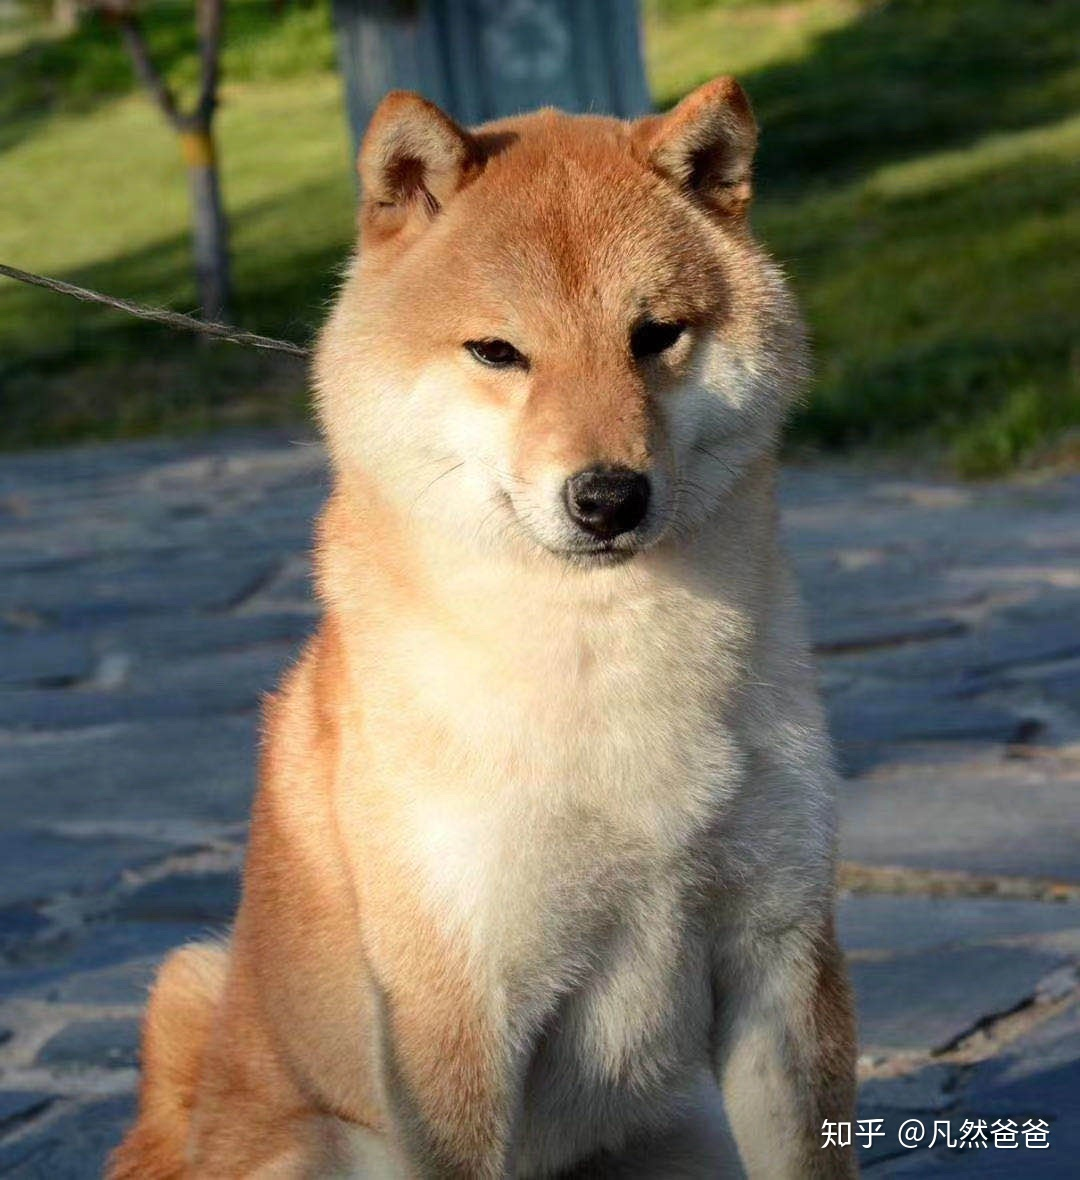

In [6]:
img

In [7]:
img_t = preprocess(img)

In [8]:
import torch
batch_t = torch.unsqueeze(img_t, 0)

In [9]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [10]:
out = resnet(batch_t)
out

tensor([[-4.1278e-01, -7.6068e-01,  5.8235e-01, -7.6871e-01, -2.1902e+00,
         -1.3008e+00, -2.6741e+00, -1.3577e+00,  2.3136e-01, -2.5193e+00,
          7.6342e-01, -7.5148e-01, -1.9130e+00, -5.5601e-01, -1.6034e+00,
         -8.7996e-01, -1.0756e-01,  9.1108e-01,  2.9225e-01, -1.3730e+00,
         -1.1483e+00, -1.3604e+00, -1.7692e+00, -1.1370e+00, -2.3526e+00,
         -1.0931e+00, -1.7845e+00, -7.9592e-01, -1.4062e+00, -2.3414e+00,
         -1.0644e+00, -1.7187e+00, -7.6234e-01, -1.7511e+00, -9.0804e-01,
         -8.0481e-01, -2.0069e+00, -2.0119e+00, -1.4919e+00, -1.6334e+00,
          2.8785e-01, -1.1545e+00,  7.7017e-01, -4.3693e-01, -1.3776e+00,
         -1.1999e+00,  3.4135e-01, -6.0677e-01, -2.1563e+00, -6.1495e-01,
         -1.1316e+00, -1.1841e+00, -8.8372e-02,  1.8014e-01, -6.9953e-02,
         -1.9023e-01, -1.1288e+00, -7.9341e-01, -9.5809e-01,  4.7622e-02,
          1.6675e+00, -4.6172e-01, -1.5304e-01,  9.4156e-02,  1.0976e-01,
         -1.1970e+00,  2.7951e-01,  1.

In [11]:
with open('./data/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [12]:
_, index = torch.max(out, 1)

In [13]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

In [14]:
labels[index[0]], percentage[index[0]].item()

('dingo, warrigal, warragal, Canis dingo', 80.86235809326172)